In [ ]:
import pandas as pd
from sklearn import metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot.pandas
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

df = pd.read_csv('car_evaluation.csv', header =None)
cols = ['BuyPrice', 'Maintenance', 'NumDoors', 'NumPersons', 'LuggageBoot', 'Safety', 'carAccept']
df.columns = cols

df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BuyPrice     1728 non-null   object
 1   Maintenance  1728 non-null   object
 2   NumDoors     1728 non-null   object
 3   NumPersons   1728 non-null   object
 4   LuggageBoot  1728 non-null   object
 5   Safety       1728 non-null   object
 6   carAccept    1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


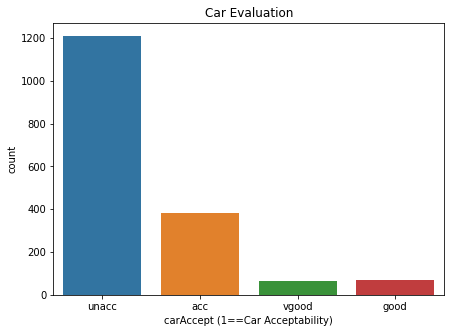

In [ ]:
#Data Visualisation
f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x='carAccept', data=df)
_ = plt.title('Car Evaluation')
_ = plt.xlabel('carAccept (1==Car Acceptability)')


In [ ]:
x = df.drop('carAccept', axis=1)
y = df['carAccept']

#split the data into training and testing datasets
# this is the last time we remind you that random_state parameter allows you to obtain the same results every time your run the train_test_split statement
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#Convert to numeric the categorical data
onehotencode= OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit and transform the testing dataset
x_train_prepared=onehotencode.fit_transform(x_train)

# Transform the testing dataset
x_test_prepared=onehotencode.transform(x_test)

In [ ]:
# Prepare the model
decision_tree = DecisionTreeClassifier(criterion='gini', min_samples_split=2, max_depth=4, random_state=0)

#To check the parameters for the DecisionTreeClassifier you can type the following, but that's is not needed
#treemodel.get_params().keys()

#Optimise the Model using GridSearch
parameters = {'criterion':['gini','entropy', 'log_loss'],
              'max_depth':[2,3,4,5,6,7,20,30,40,50,60,70,100,130,140,150],
              'min_samples_split': [2,3,4,5,6,7,8, 9, 10],
              'max_leaf_nodes': [2,3,4,5,6,7,8, 9, 10],
              'max_features': [2,3,4,5,6]
             }

grid_search = GridSearchCV(estimator=decision_tree, param_grid=parameters, cv=10)
grid_search.fit(x_train_prepared, y_train)
print('The best parameters:\n', grid_search.best_params_)
optimal_decision_tree=grid_search.best_estimator_
print('The best model:\n', optimal_decision_tree)
print('The best Accuracy on the training dataset: {:.2f} %\n'.format(grid_search.best_score_*100))

#Plot Decision Tree for the optimal decision tree that was fitted on the trainnig dataset
plt.figure(figsize=(20,12))
plot_tree(optimal_decision_tree)
plt.savefig('tree.png')

In [ ]:
#Testing the optimized model by maknig predicton on the testing dataset
optimal_pred = optimal_decision_tree.predict(x_test_prepared)
#Compute the optimized Model's accuracy
optimalscore = accuracy_score(y_test, optimal_pred)*100
print("\nTest Accuracy Score on the testing dataset: {:.2f} %".format( optimalscore ))